# Import Libraries and Load Wine Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Linear Regression vs Polynomial Regression (degree=3)

Linear Regression R2: 0.8825140263270399
Polynomial Regression R2: 0.843153127105081


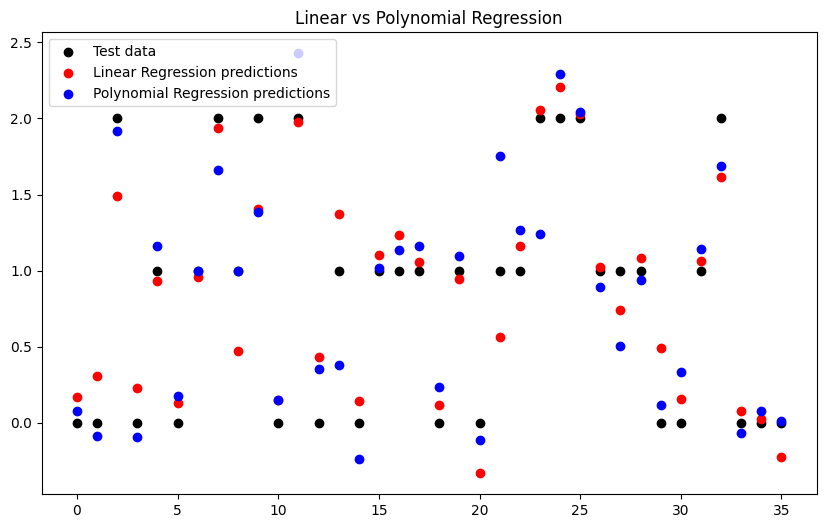

In [2]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))


plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Test data')
plt.scatter(range(len(y_test)), y_pred_lin, color='red', label='Linear Regression predictions')
plt.scatter(range(len(y_test)), y_pred_poly, color='blue', label='Polynomial Regression predictions')
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()

# Linear Regression vs Ridge Regression vs Lasso Regression

Linear Regression R2 (poly features): 0.843153127105081
Ridge Regression R2: 0.8567564003071733
Lasso Regression R2: 0.8191549999981613


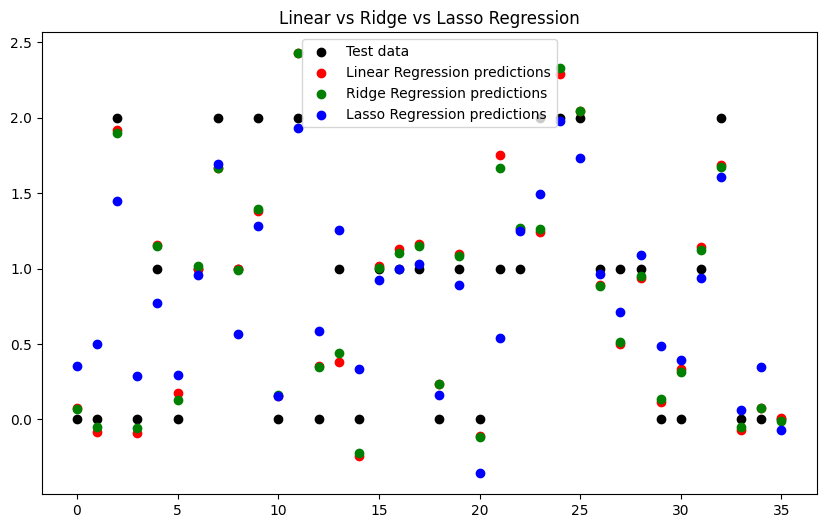

In [3]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly, y_train)
y_pred_lin2 = lin_reg2.predict(X_test_poly)


ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train)
y_pred_lasso = lasso_reg.predict(X_test_poly)

print("Linear Regression R2 (poly features):", r2_score(y_test, y_pred_lin2))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Test data')
plt.scatter(range(len(y_test)), y_pred_lin2, color='red', label='Linear Regression predictions')
plt.scatter(range(len(y_test)), y_pred_ridge, color='green', label='Ridge Regression predictions')
plt.scatter(range(len(y_test)), y_pred_lasso, color='blue', label='Lasso Regression predictions')
plt.legend()
plt.title("Linear vs Ridge vs Lasso Regression")
plt.show()

# Performance Summary

In [4]:
print("\nModel Performance Summary:")
print("---------------------------------")
print(f"Linear Regression R2 (linear features): {r2_score(y_test, y_pred_lin):.3f}")
print(f"Polynomial Regression R2: {r2_score(y_test, y_pred_poly):.3f}")
print(f"Linear Regression (poly features) R2: {r2_score(y_test, y_pred_lin2):.3f}")
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge):.3f}")
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso):.3f}")


Model Performance Summary:
---------------------------------
Linear Regression R2 (linear features): 0.883
Polynomial Regression R2: 0.843
Linear Regression (poly features) R2: 0.843
Ridge Regression R2: 0.857
Lasso Regression R2: 0.819
